https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/Day%2013%20SVM.md

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [36]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# In the logistic regression example X-test used just transform. The outcome is the same.

In [39]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 7, 25]])

<AxesSubplot:>

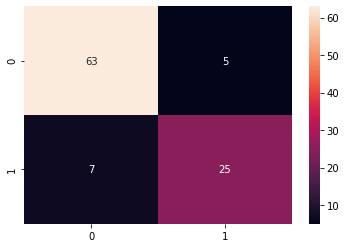

In [25]:
#See Keith Galli tutorial

#labels = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.GROCERY, Category.PATIO]
#cm = confusion_matrix(test_y, y_pred, labels=labels)
#df_cm = pd.DataFrame(cm, index=labels, columns=labels)

df_cm = pd.DataFrame(cm)

sn.heatmap(df_cm, annot=True, fmt='d')

In [41]:
f1_score(y_test, y_pred, average=None)

array([0.91304348, 0.80645161])

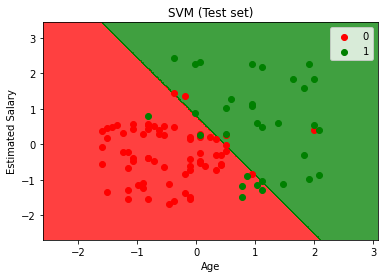

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['r', 'g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(['r', 'g'])(i), label = j)
    
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

f1_score of logistic regression is higher than svm: todo trying different parameters to improve results